In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Healthcare dataset Scenario Readmission predictions

In [10]:
df = pd.read_csv("healthcare_readmission_200.csv")
df.head()

,Length_of_stay,Num_lab_tests,Satisfaction_score,Readmitted
0,7,10,6,0
1,4,32,7,0
2,13,32,10,0
3,11,48,7,1
4,8,48,10,0


In [11]:
df.shape

(200, 4)

In [19]:
df["Readmitted"].value_counts()

Readmitted
0    153
1     47
Name: count, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Length_of_stay      200 non-null    int64
 1   Num_lab_tests       200 non-null    int64
 2   Satisfaction_score  200 non-null    int64
 3   Readmitted          200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, random_state=42,loss='log_loss', max_depth=1)

X = df.drop("Readmitted", axis=1)
y = df["Readmitted"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

GBC.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,150
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,1
,min_impurity_decrease,0.0
,init,None


In [42]:
y_pred = GBC.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        32
           1       1.00      0.25      0.40         8

    accuracy                           0.85        40
   macro avg       0.92      0.62      0.66        40
weighted avg       0.87      0.85      0.81        40

0.85


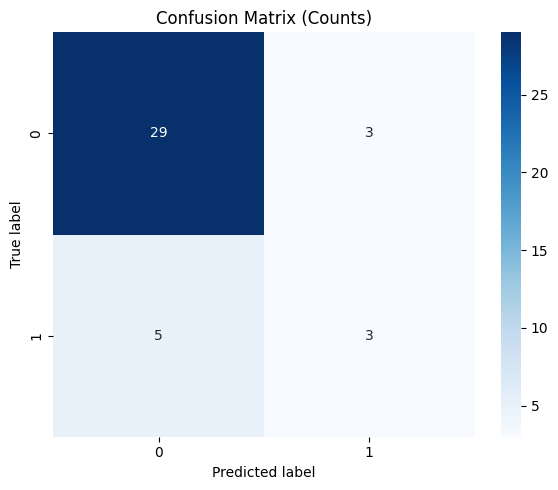

In [22]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,         
    fmt="d",             
    cmap="Blues",        
    cbar=True
)
plt.title("Confusion Matrix (Counts)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()
